<a href="https://colab.research.google.com/github/ChrisMar2/ChrisMar2/blob/main/tweet_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
#from spacy.lang.en import English
import string
from keras.layers import Dropout
from nltk.tokenize import TweetTokenizer

In [4]:
df=pd.read_excel('/content/TweetSentiment_60.xlsx')
df

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
101154,4,@jessikasay congrats on the followers
101155,4,@dannywood As in &quot;back dat ass on up in h...
101156,4,School In about 12 minutes then I get picked u...
101157,4,@itsMeeeech -- sounds fun!


In [5]:
df["tweet"] = df["tweet"].astype(str)

In [6]:
df["processed_tweets"] = df["tweet"].str.lower()
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [7]:
print("\nOriginal Tweet:",df['tweet'][0])
print(df['processed_tweets'][0])


Original Tweet: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d


In [8]:
len(df['processed_tweets'])

101159

In [9]:
tknzr = TweetTokenizer(strip_handles=True)

for a in range(len(df['processed_tweets'])):

  result = tknzr.tokenize(df['processed_tweets'][a])
  res=" ".join(result)
  df['processed_tweets'][a]=res
print("\nTokenize a twitter text:")
print(df['processed_tweets'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys



Tokenize a twitter text:
0         http://twitpic.com/2y1zl - awww , that's a bum...
1         is upset that he can't update his facebook by ...
2         i dived many times for the ball . managed to s...
3            my whole body feels itchy and like its on fire
4         no , it's not behaving at all . i'm mad . why ...
                                ...                        
101154                            congrats on the followers
101155    as in " back dat ass on up in here for some fu...
101156    school in about 12 minutes then i get picked u...
101157                                     - - sounds fun !
101158    good morning everyone welcome to my new follow...
Name: processed_tweets, Length: 101159, dtype: object


In [10]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - awww , that's a bum..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball . managed to s...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no , it's not behaving at all . i'm mad . why ..."


In [11]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["processed_tweets"] = df["processed_tweets"].apply(lambda text: remove_punctuation(text))
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",httptwitpiccom2y1zl awww thats a bummer you...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


In [12]:
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

In [13]:
tknzr = TweetTokenizer(strip_handles=True)

for a in range(len(df['processed_tweets'])):

  result = remove_URL(df['processed_tweets'][a])
  df['processed_tweets'][a]=result
print("No URLs:")
print(result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No URLs:
good morning everyone welcome to my new followers and    big hug    to everyone  hope your monday morning is moving along spectacularly 


In [14]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("game is on 🔥🔥")

'game is on '

In [15]:
for a in range(len(df['processed_tweets'])):

  result = remove_emoji(df['processed_tweets'][a])
  df['processed_tweets'][a]=result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^= ":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [17]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

remove_emoticons("Hello :-)")

'Hello '

In [18]:
for a in range(len(df['processed_tweets'])):

  result = remove_emoticons(df['processed_tweets'][a])
  df['processed_tweets'][a]=result
print("No Emoticons:")
print(result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No Emoticons:
good morning everyone welcome to my new followers and    big hug    to everyone  hope your monday morning is moving along spectacularly 


In [19]:
df.isna().sum()

target              0
tweet               0
processed_tweets    0
dtype: int64

In [20]:
df['Target']=df['target'].replace(4,1)
df['Target'].value_counts()

1    51150
0    50009
Name: Target, dtype: int64

In [21]:
import os
import re

import numpy as np
import tensorflow as tf

# np.random.seed(1)
# tf.set_random_seed(2)

import pandas as pd
import keras
# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics import f1_score, classification_report, log_loss

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Flatten
from keras.layers import Dropout, Conv1D, GlobalMaxPool1D, GRU, GlobalAvgPool1D
# from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [22]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [23]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


 #apply function   
df['processed_tweets'] = df['processed_tweets'].apply(lambda text: cleaning_stopwords(text))
df['processed_tweets'].head()

0    awww thats bummer shoulda got david carr third...
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                 no not behaving im mad cant see over
Name: processed_tweets, dtype: object

In [24]:
dataset = df.drop('tweet',axis=1)
dataset

,target,processed_tweets,Target
0,0,awww thats bummer shoulda got david carr third...,0
1,0,upset cant update facebook texting might cry r...,0
2,0,dived many times ball managed save 50 rest go ...,0
3,0,whole body feels itchy like fire,0
4,0,no not behaving im mad cant see over,0
...,...,...,...
101154,4,congrats followers,1
101155,4,back dat ass full service,1
101156,4,school 12 minutes get picked morgan,1
101157,4,sounds fun,1


In [25]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['processed_tweets']= df['processed_tweets'].apply(lambda x: stemming_on_text(x))
df['processed_tweets'].head()

0    awww thats bummer shoulda got david carr third...
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                 no not behaving im mad cant see over
Name: processed_tweets, dtype: object

In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
#import nltk
#nltk.download('wordnet')


lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['processed_tweets'] = df['processed_tweets'].apply(lambda x: lemmatizer_on_text(x))
df['processed_tweets'].head()

LookupError: ignored

In [30]:
X = df['processed_tweets']
y = df['Target']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y,random_state = 42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(91043,)
(10116,)


In [32]:
X_test

10538                                     ummmm wanna come
89283    lol aww celebrate earlier get loads complitmen...
40354             downloading 22nd episode heroes season 3
11834                                 going sleep im tired
585      cant set feet ground missing eyelid people mig...
                               ...                        
77266         oop hick ups oop nope awwwww wanted hick ups
51995    back 2 mile walk woobie doggie yet another stu...
22770              noooooo boo computer problems empathise
61798    hrm guess hit sack work 6 hours 9 hours later ...
36296                home justins farewell dinner dont die
Name: processed_tweets, Length: 10116, dtype: object

In [33]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=False)
tokenizer.fit_on_texts(X_train)
train_text_vec = tokenizer.texts_to_sequences(X_train)
tokenizer.fit_on_texts(X_test)
test_text_vec = tokenizer.texts_to_sequences(X_test)
test_text_vec

[[7002, 108, 68],
 [20, 307, 1608, 735, 6, 991, 52122, 308, 586, 852],
 [1728, 5511, 713, 2173, 517, 53],
 [12, 44, 1, 90],
 [15, 464, 848, 2085, 238, 15458, 75, 218, 6],
 [76, 99, 95, 264, 635, 9, 301, 10, 43, 5, 43, 758, 63, 16, 395, 1380, 53, 8],
 [33, 128, 23, 147, 252, 52123, 665, 95],
 [56, 103, 7, 8, 35, 23, 274, 301, 1304, 574, 194],
 [1008, 49, 12, 37, 70, 233, 4892, 182, 86, 311],
 [2860, 75, 142, 1547, 1611],
 [23, 133, 813, 1, 96, 1868, 816, 63, 6018, 658, 7496, 22710, 10076, 11, 4362],
 [364, 381, 34, 11, 142, 8, 5],
 [20, 13956, 503, 30, 1978, 9745],
 [68, 1639, 52124, 949, 79, 714],
 [106, 4, 3855, 21743, 19, 202, 1095, 2707, 180, 284, 72],
 [2548,
  226,
  8539,
  11,
  3229,
  2045,
  244,
  98,
  449,
  1,
  441,
  1440,
  3,
  13015,
  118,
  940],
 [10706, 2828, 48],
 [35, 227, 52125, 648, 215, 7, 2428, 325, 154, 99, 101, 648, 52126],
 [102, 1331, 246],
 [4, 267],
 [10, 187, 107],
 [985, 807, 639, 4, 125, 5002, 511, 579],
 [1173, 4731, 4410, 2717, 227, 2458, 916, 12

In [34]:
lenght = []
for i in (train_text_vec + test_text_vec):
  if  10<len(i)<28:
    lenght.append(len(i))
max(lenght)

27

In [36]:
from keras.preprocessing import sequence
max_words = 28
#X_train = sequence.pad_sequences(train_text_vec, maxlen=max_words)
X_train = pad_sequences(train_text_vec, maxlen=max_words)
#X_test = sequence.pad_sequences(test_text_vec, maxlen=max_words)
X_test = pad_sequences(test_text_vec, maxlen=max_words)
# modelCNN = None
modelRNN=None
modelLSTM=None
print ("After Padding X[train[0]=\n", X_test[0])

After Padding X[train[0]=
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 7002  108   68]


In [37]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 55313 unique tokens.


In [38]:
len((train_text_vec + test_text_vec))*2

202318

In [39]:
vocabulary_size = len((train_text_vec + test_text_vec))*2

In [41]:
embeddings_index = {}
f = open('/content/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 6118 word vectors.


In [42]:
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
# embedding_matrix.shape

In [43]:
from keras.layers import SimpleRNN
from tensorflow.keras import regularizers

In [44]:
embedding_size=100


modelRNN=Sequential()
modelRNN.add(Embedding(vocabulary_size,embedding_size,weights = [embedding_matrix],input_length=max_words)) #embdsize
# modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelRNN.add(Dropout(0.70))
modelRNN.add(SimpleRNN(150,activation = "tanh",kernel_regularizer=regularizers.l2(0.01))) 
modelRNN.add(Dropout(0.15))
modelRNN.add(Dense(1, activation='sigmoid'))
print(modelRNN.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 100)           20231800  
                                                                 
 dropout (Dropout)           (None, 28, 100)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 150)               37650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 20,269,601
Trainable params: 20,269,601
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
modelRNN.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [46]:
batch_size = 1024
num_epochs = 20
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
callback_listRNN  = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modRNN_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [47]:
history = modelRNN.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs, 
             callbacks=callback_listRNN)
modelRNN.save_weights("my_modRNN_Latest")

Epoch 1/20
87/88 [============================>.] - ETA: 0s - loss: 1.3378 - accuracy: 0.5382

88/88 [==============================] - 11s 80ms/step - loss: 1.3336 - accuracy: 0.5386 - val_loss: 0.8961 - val_accuracy: 0.6299
Epoch 2/20
88/88 [==============================] - ETA: 0s - loss: 0.7789 - accuracy: 0.6115

88/88 [==============================] - 4s 44ms/step - loss: 0.7789 - accuracy: 0.6115 - val_loss: 0.6565 - val_accuracy: 0.6738
Epoch 3/20
88/88 [==============================] - ETA: 0s - loss: 0.6310 - accuracy: 0.6787

88/88 [==============================] - 4s 45ms/step - loss: 0.6310 - accuracy: 0.6787 - val_loss: 0.5544 - val_accuracy: 0.7266
Epoch 4/20
88/88 [==============================] - ETA: 0s - loss: 0.5725 - accuracy: 0.7168

88/88 [==============================] - 4s 43ms/step - loss: 0.5725 - accuracy: 0.7168 - val_loss: 0.5247 - val_accuracy: 0.7637
Epoch 5/20
88/88 [==============================] - ETA: 0s - loss: 0.5473 - accuracy: 0.7349

88/88 [==============================] - 4s 45ms/step - loss: 0.5473 - accuracy: 0.7349 - val_loss: 0.5010 - val_accuracy: 0.7715
Epoch 6/20
88/88 [==============================] - ETA: 0s - loss: 0.5222 - accuracy: 0.7515

88/88 [==============================] - 4s 44ms/step - loss: 0.5222 - accuracy: 0.7515 - val_loss: 0.4900 - val_accuracy: 0.7666
Epoch 7/20
87/88 [============================>.] - ETA: 0s - loss: 0.5059 - accuracy: 0.7629

88/88 [==============================] - 4s 44ms/step - loss: 0.5059 - accuracy: 0.7630 - val_loss: 0.4864 - val_accuracy: 0.7812
Epoch 8/20
88/88 [==============================] - ETA: 0s - loss: 0.4888 - accuracy: 0.7738

88/88 [==============================] - 4s 43ms/step - loss: 0.4888 - accuracy: 0.7738 - val_loss: 0.4844 - val_accuracy: 0.7803
Epoch 9/20
88/88 [==============================] - ETA: 0s - loss: 0.4743 - accuracy: 0.7847

88/88 [==============================] - 4s 44ms/step - loss: 0.4743 - accuracy: 0.7847 - val_loss: 0.4797 - val_accuracy: 0.7764
Epoch 10/20
87/88 [============================>.] - ETA: 0s - loss: 0.4707 - accuracy: 0.7880

88/88 [==============================] - 4s 43ms/step - loss: 0.4709 - accuracy: 0.7879 - val_loss: 0.4764 - val_accuracy: 0.7832
Epoch 11/20
88/88 [==============================] - ETA: 0s - loss: 0.4538 - accuracy: 0.7979

88/88 [==============================] - 4s 44ms/step - loss: 0.4538 - accuracy: 0.7979 - val_loss: 0.4840 - val_accuracy: 0.7754
Epoch 12/20
87/88 [============================>.] - ETA: 0s - loss: 0.4444 - accuracy: 0.8037

88/88 [==============================] - 4s 43ms/step - loss: 0.4442 - accuracy: 0.8038 - val_loss: 0.4848 - val_accuracy: 0.7832
Epoch 13/20
88/88 [==============================] - ETA: 0s - loss: 0.4302 - accuracy: 0.8128

88/88 [==============================] - 4s 46ms/step - loss: 0.4302 - accuracy: 0.8128 - val_loss: 0.4803 - val_accuracy: 0.7910
Epoch 14/20
88/88 [==============================] - ETA: 0s - loss: 0.4270 - accuracy: 0.8157

88/88 [==============================] - 5s 62ms/step - loss: 0.4270 - accuracy: 0.8157 - val_loss: 0.5040 - val_accuracy: 0.7871
Epoch 15/20
88/88 [==============================] - ETA: 0s - loss: 0.4131 - accuracy: 0.8227

88/88 [==============================] - 5s 51ms/step - loss: 0.4131 - accuracy: 0.8227 - val_loss: 0.4877 - val_accuracy: 0.7783
Epoch 16/20
87/88 [============================>.] - ETA: 0s - loss: 0.4021 - accuracy: 0.8310

88/88 [==============================] - 4s 49ms/step - loss: 0.4017 - accuracy: 0.8312 - val_loss: 0.5001 - val_accuracy: 0.7832
Epoch 17/20
88/88 [==============================] - ETA: 0s - loss: 0.3952 - accuracy: 0.8336

88/88 [==============================] - 4s 44ms/step - loss: 0.3952 - accuracy: 0.8336 - val_loss: 0.5001 - val_accuracy: 0.7852
Epoch 18/20
87/88 [============================>.] - ETA: 0s - loss: 0.3912 - accuracy: 0.8350

88/88 [==============================] - 4s 45ms/step - loss: 0.3914 - accuracy: 0.8349 - val_loss: 0.5014 - val_accuracy: 0.7803
Epoch 19/20
88/88 [==============================] - ETA: 0s - loss: 0.3796 - accuracy: 0.8417

88/88 [==============================] - 4s 45ms/step - loss: 0.3796 - accuracy: 0.8417 - val_loss: 0.5067 - val_accuracy: 0.7842
Epoch 20/20
88/88 [==============================] - ETA: 0s - loss: 0.3736 - accuracy: 0.8439

88/88 [==============================] - 4s 44ms/step - loss: 0.3736 - accuracy: 0.8439 - val_loss: 0.5092 - val_accuracy: 0.7695


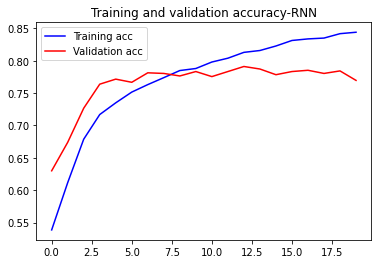

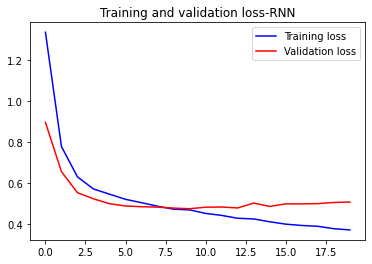

In [48]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-RNN')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-RNN')
plt.legend()
 
plt.show()

In [49]:
#Loading the last epoch model
modelRNN=Sequential()
modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelRNN.add(SimpleRNN(150,activation = "tanh")) 
modelRNN.add(Dense(1, activation='sigmoid'))
print(modelRNN.summary())
modelRNN.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])
modelRNN.load_weights("my_modRNN_Latest")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 28, 100)           20231800  
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 150)               37650     
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 20,269,601
Trainable params: 20,269,601
Non-trainable params: 0
_________________________________________________________________


None


In [50]:
callback_listLSTM = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modLSTM_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [51]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [52]:
embedding_size=100
modelLSTM=Sequential()
modelLSTM.add(Embedding(vocabulary_size,100,weights = [embedding_matrix],input_length=28)) #embdsize
# modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelLSTM.add(Dropout(0.70))
modelLSTM.add(LSTM(150,activation = "tanh",kernel_regularizer=regularizers.l2(0.01))) 
modelLSTM.add(Dropout(0.15))
modelLSTM.add(Dense(1, activation='sigmoid'))
print(modelLSTM.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 28, 100)           20231800  
                                                                 
 dropout_2 (Dropout)         (None, 28, 100)           0         
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 20,382,551
Trainable params: 20,382,551
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
modelLSTM.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [54]:
batch_size = 1024
num_epochs = 20
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
callback_listLSTM = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modRNN_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [55]:
LSTMhistory = modelLSTM.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs, 
             callbacks=callback_listLSTM)
modelLSTM.save_weights("my_modLSTM_Latest")

Epoch 1/20
87/88 [============================>.] - ETA: 0s - loss: 1.2016 - accuracy: 0.5809

88/88 [==============================] - 6s 34ms/step - loss: 1.1965 - accuracy: 0.5813 - val_loss: 0.6811 - val_accuracy: 0.6777
Epoch 2/20
87/88 [============================>.] - ETA: 0s - loss: 0.6320 - accuracy: 0.6717

88/88 [==============================] - 2s 28ms/step - loss: 0.6315 - accuracy: 0.6721 - val_loss: 0.5581 - val_accuracy: 0.7275
Epoch 3/20
87/88 [============================>.] - ETA: 0s - loss: 0.5685 - accuracy: 0.7188

88/88 [==============================] - 2s 28ms/step - loss: 0.5684 - accuracy: 0.7190 - val_loss: 0.5231 - val_accuracy: 0.7500
Epoch 4/20
87/88 [============================>.] - ETA: 0s - loss: 0.5336 - accuracy: 0.7435

88/88 [==============================] - 2s 28ms/step - loss: 0.5337 - accuracy: 0.7433 - val_loss: 0.4967 - val_accuracy: 0.7764
Epoch 5/20
88/88 [==============================] - ETA: 0s - loss: 0.5113 - accuracy: 0.7594

88/88 [==============================] - 3s 32ms/step - loss: 0.5113 - accuracy: 0.7594 - val_loss: 0.4860 - val_accuracy: 0.7705
Epoch 6/20
87/88 [============================>.] - ETA: 0s - loss: 0.4908 - accuracy: 0.7729

88/88 [==============================] - 3s 34ms/step - loss: 0.4905 - accuracy: 0.7731 - val_loss: 0.4780 - val_accuracy: 0.7783
Epoch 7/20
88/88 [==============================] - ETA: 0s - loss: 0.4754 - accuracy: 0.7841

88/88 [==============================] - 3s 32ms/step - loss: 0.4754 - accuracy: 0.7841 - val_loss: 0.4764 - val_accuracy: 0.7734
Epoch 8/20
87/88 [============================>.] - ETA: 0s - loss: 0.4614 - accuracy: 0.7931

88/88 [==============================] - 3s 29ms/step - loss: 0.4612 - accuracy: 0.7933 - val_loss: 0.4786 - val_accuracy: 0.7725
Epoch 9/20
87/88 [============================>.] - ETA: 0s - loss: 0.4440 - accuracy: 0.8053

88/88 [==============================] - 3s 29ms/step - loss: 0.4439 - accuracy: 0.8053 - val_loss: 0.4809 - val_accuracy: 0.7832
Epoch 10/20
87/88 [============================>.] - ETA: 0s - loss: 0.4283 - accuracy: 0.8149

88/88 [==============================] - 3s 29ms/step - loss: 0.4281 - accuracy: 0.8149 - val_loss: 0.4896 - val_accuracy: 0.7695
Epoch 11/20
87/88 [============================>.] - ETA: 0s - loss: 0.4123 - accuracy: 0.8251

88/88 [==============================] - 3s 29ms/step - loss: 0.4125 - accuracy: 0.8250 - val_loss: 0.4982 - val_accuracy: 0.7783
Epoch 12/20
87/88 [============================>.] - ETA: 0s - loss: 0.4004 - accuracy: 0.8323

88/88 [==============================] - 3s 30ms/step - loss: 0.4003 - accuracy: 0.8324 - val_loss: 0.5023 - val_accuracy: 0.7695
Epoch 13/20
87/88 [============================>.] - ETA: 0s - loss: 0.3906 - accuracy: 0.8374

88/88 [==============================] - 3s 28ms/step - loss: 0.3905 - accuracy: 0.8374 - val_loss: 0.5076 - val_accuracy: 0.7676
Epoch 14/20
87/88 [============================>.] - ETA: 0s - loss: 0.3819 - accuracy: 0.8435

88/88 [==============================] - 3s 29ms/step - loss: 0.3818 - accuracy: 0.8435 - val_loss: 0.5108 - val_accuracy: 0.7686
Epoch 15/20
87/88 [============================>.] - ETA: 0s - loss: 0.3711 - accuracy: 0.8492

88/88 [==============================] - 2s 28ms/step - loss: 0.3709 - accuracy: 0.8493 - val_loss: 0.5234 - val_accuracy: 0.7617
Epoch 16/20
87/88 [============================>.] - ETA: 0s - loss: 0.3643 - accuracy: 0.8520

88/88 [==============================] - 2s 28ms/step - loss: 0.3642 - accuracy: 0.8520 - val_loss: 0.5320 - val_accuracy: 0.7568
Epoch 17/20
87/88 [============================>.] - ETA: 0s - loss: 0.3586 - accuracy: 0.8557

88/88 [==============================] - 2s 28ms/step - loss: 0.3588 - accuracy: 0.8556 - val_loss: 0.5335 - val_accuracy: 0.7646
Epoch 18/20
87/88 [============================>.] - ETA: 0s - loss: 0.3521 - accuracy: 0.8591

88/88 [==============================] - 2s 28ms/step - loss: 0.3518 - accuracy: 0.8592 - val_loss: 0.5346 - val_accuracy: 0.7568
Epoch 19/20
87/88 [============================>.] - ETA: 0s - loss: 0.3457 - accuracy: 0.8610

88/88 [==============================] - 2s 28ms/step - loss: 0.3459 - accuracy: 0.8609 - val_loss: 0.5381 - val_accuracy: 0.7617
Epoch 20/20
87/88 [============================>.] - ETA: 0s - loss: 0.3396 - accuracy: 0.8641

88/88 [==============================] - 2s 28ms/step - loss: 0.3396 - accuracy: 0.8642 - val_loss: 0.5505 - val_accuracy: 0.7607


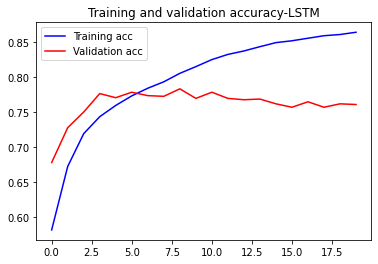

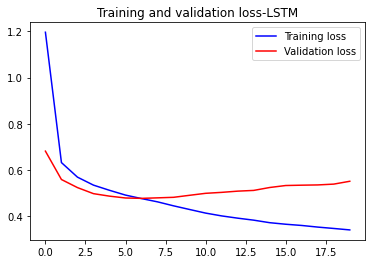

In [56]:
import matplotlib.pyplot as plt
acc = modelLSTM.history.history['accuracy']
val_acc = modelLSTM.history.history['val_accuracy']
loss = modelLSTM.history.history['loss']
val_loss = modelLSTM.history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-LSTM')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-LSTM')
plt.legend()
 
plt.show()

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
y_predict = modelRNN.predict(X_test)
print(classification_report(y_test, y_predict.round()))

317/317 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.59      0.56      0.57      4986
           1       0.59      0.61      0.60      5130

    accuracy                           0.59     10116
   macro avg       0.59      0.59      0.59     10116
weighted avg       0.59      0.59      0.59     10116



In [63]:
cf_matrix=confusion_matrix(y_test, y_predict.round())

In [64]:
cf_matrix=confusion_matrix(y_test, y_predict.round())

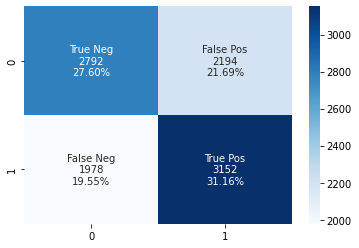

In [65]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [66]:
test_data=['today is a sad day','he was happy today','not a good job']

In [67]:
x_test  = np.array( tokenizer.texts_to_sequences(test_data))
x_test = pad_sequences(x_test, maxlen=28)
x_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
         61,   5],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          4, 276]], dtype=int32)

In [68]:
for i in range(0,len(test_data)):
  print('Test sentence:-',test_data[i])
  
  res=modelRNN.predict(x_test)
  if res[i]>0.3:
    print('Sentiment type:Positive',res[i])
  else:
    print('Sentiment type:Negative',res[i])
  print('==================================================\n')

Test sentence:- today is a sad day
1/1 [==============================] - 0s 19ms/step
Sentiment type:Negative [0.02301282]

Test sentence:- he was happy today
1/1 [==============================] - 0s 18ms/step
Sentiment type:Positive [0.39761165]

Test sentence:- not a good job
1/1 [==============================] - 0s 18ms/step
Sentiment type:Positive [0.42313135]



In [69]:
#pre- processing custom tweets ()
def preprocess_tweets(tweet):
    #fo = open('/content/stopwords.txt', "r+")
    #stop_words = list(fo.read().split(','))
    #translation={39:None}
    processed_tweet = tweet
    processed_tweet=re.sub('\d+', '',tweet)
    processed_tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",processed_tweet).split())
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in str(STOPWORDS))
    
    return(processed_tweet)

In [70]:
def tweet_to_vector(text):
  print('Original tweet:-',text)
  text=preprocess_tweets(text)
  print('Processed tweet:- '+text)
  text=text.split(' ')
  tokenizer = Tokenizer(lower=False)
  tokenizer.fit_on_texts(text)
  text_vec = tokenizer.texts_to_sequences(text)
  word_index = tokenizer.word_index
  print(word_index)
  print('==================================================')
  embeddings_index = {}
  f = open('/content/glove.6B.100d.txt')
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    if word in word_index.keys():  
      embeddings_index[word] = coefs
  for notw in word_index.keys():
    if notw not in embeddings_index.keys():
      embeddings_index[notw] = 'unknown'
  f.close()
  print('Vector for each word in processed tweet')
  print(embeddings_index)

In [71]:
custom_tweet='@meera2353 Hello this is very bad that company fired them, not a good day #job #sad #employeeprotest'
custom_tweets= tweet_to_vector(custom_tweet)

Original tweet:- @meera2353 Hello this is very bad that company fired them, not a good day #job #sad #employeeprotest
Processed tweet:- Hello bad company fired not good day job sad employeeprotest
{'Hello': 1, 'bad': 2, 'company': 3, 'fired': 4, 'not': 5, 'good': 6, 'day': 7, 'job': 8, 'sad': 9, 'employeeprotest': 10}
Vector for each word in processed tweet
{'not': array([-1.9104e-01,  1.7601e-01,  3.6920e-01, -5.0323e-01, -4.7561e-01,
        1.5798e-01, -1.1679e-01,  2.1052e-01,  3.2652e-01,  1.2194e-01,
        9.0944e-02,  2.6089e-01,  7.6294e-01,  6.9673e-04, -5.0001e-02,
       -4.4853e-01,  3.6239e-01,  5.6345e-01, -6.8702e-01,  3.3237e-01,
        3.1285e-01, -1.4207e-01,  3.5327e-01, -1.6426e-01, -1.0693e-01,
        7.7786e-02, -1.7704e-01, -9.2897e-01,  1.4680e-01, -1.3585e-01,
        2.5682e-01,  6.6019e-01, -3.5569e-01,  2.1838e-01,  3.8173e-01,
        5.4337e-01,  1.0197e-01,  3.5230e-01, -2.5510e-01, -1.5155e-01,
       -6.7434e-01,  1.6903e-01,  1.6413e-01, -5.3843e-0